# Replication of Sims (2011)

This example replicates [Sims (2011)](http://sims.princeton.edu/yftp/RIMP/handbookChapterRI2.pdf) from the Handbook of Monetary Economics using the [DRIPs](https://github.com/afrouzi/DRIPs) package.

See [Afrouzi and Yang (2019)](http://www.afrouzi.com/dynamic_inattention.pdf) for background on the theory.

## Contents
* Setup
* Initialization
* Solution
    * Benchmark Parameterization
    * Lower Cost of Attention: $\omega = 0.1$
    * Other Discount Factors: $\beta \in \{0,1\}$
* Impulse Response Functions
    * Benchmark Parameterization
    * Lower Cost of Attention: $\omega = 0.1$
    * Other Discount Factors: $\beta \in \{0,1\}$
* Extensions
    * Transition Dynamics of Attention
    * Impulse Response Functions with Information Treatment

## Setup

The problem in [Sims (2011)](http://sims.princeton.edu/yftp/RIMP/handbookChapterRI2.pdf), as it appears on page 21, with slight change of notation,
$$
\begin{aligned}
            & \min_{\{\Sigma_{t|t}\succeq 0\}_{t\geq 0}} \mathbb{E}_0\left[\sum_{t=0}^\infty
  \beta^t \left(tr(\Sigma_{t|t}\mathbf{H}\mathbf{H}')+\omega\log\left(\frac{|\Sigma_{t|t-1}|}{|\Sigma_{t|t}|}\right)\right)\right] \\
  s.t.\quad &
  \Sigma_{t+1|t}=\mathbf{A}\Sigma_{t|t}\mathbf{A}'+\mathbf{Q}\mathbf{Q}'\\
            & \Sigma_{t|t-1}-\Sigma_{t|t} \text{ positive semi-definite}
\end{aligned}
$$

where
$$
\begin{aligned}
  \mathbf{H} = \left[\begin{array}{c} 1 \\ 1\end{array}\right],
    \quad
    \mathbf{A} = \left[\begin{array}{cc}
                          0.95 & 0\\
                          0 & 0.4\\
                     \end{array}\right],
  \quad
  \mathbf{Q} = \left[\begin{array}{cc}
                          \sqrt{0.0975} & 0\\
                          0           & \sqrt{0.86}\\
                     \end{array}\right]
\end{aligned}
$$
We have renamed the parameters so that the problem directly maps to a D.R.I.P. Otherwise, the problem is the same.

## Initialization
Include the package:

In [1]:
using DRIPs;

Set parameters:

In [2]:
β = 0.9;
ω = 1.0;
A = [0.95 0.0; 0.0 0.4];
Q = [√0.0975 0.0; 0.0 √0.86];
H = [1.0; 1.0];

## Solution and Performance
### Benchmark Parameterization
Solve and display the optimal posterior covariance matrix:

In [3]:
sol_bp = Drip(ω,β,A,Q,H);
sol_bp.ss.Σ_p

2×2 Array{Float64,2}:
  0.359213  -0.177025
 -0.177025   0.794584

Performance for random values of $\omega\in [0,2]$:

In [4]:
using BenchmarkTools;
@benchmark Drip(ω,β,A,Q,H) setup = (ω = 2*rand())

BenchmarkTools.Trial: 
  memory estimate:  162.38 KiB
  allocs estimate:  1551
  --------------
  minimum time:     82.035 μs (0.00% GC)
  median time:      90.500 μs (0.00% GC)
  mean time:        112.276 μs (17.76% GC)
  maximum time:     7.499 ms (97.89% GC)
  --------------
  samples:          10000
  evals/sample:     1

Performance for random values of $\beta\in[0,1]$:

In [5]:
@benchmark Drip(ω,β,A,Q,H) setup = (β = rand())

BenchmarkTools.Trial: 
  memory estimate:  162.38 KiB
  allocs estimate:  1551
  --------------
  minimum time:     82.105 μs (0.00% GC)
  median time:      99.102 μs (0.00% GC)
  mean time:        121.709 μs (18.07% GC)
  maximum time:     7.678 ms (97.79% GC)
  --------------
  samples:          10000
  evals/sample:     1

### Lower Cost of Attention: $\omega = 0.1$
Solve and display the optimal posterior covariance matrix:

In [6]:
sol_lω = Drip(0.1,β,A,Q,H);
sol_lω.ss.Σ_p

2×2 Array{Float64,2}:
  0.319919  -0.304142
 -0.304142   0.386163

### Different Discount Factors: $\beta \in \{0,1\}$
Solve the model for $\beta=0$ and $\beta=1$ to compare with the benchmark value of $\beta=0.9$:

``\beta = 0``

In [7]:
sol_lβ = Drip(ω,0,A,Q,H);
sol_lβ.ss.Σ_p

2×2 Array{Float64,2}:
  0.495403  -0.152171
 -0.152171   0.808939

``\beta = 1``:

In [8]:
sol_hβ = Drip(ω,1,A,Q,H);
sol_hβ.ss.Σ_p

2×2 Array{Float64,2}:
  0.337666  -0.178019
 -0.178019   0.799701

## Impulse Response Functions
### Benchmark Parameterization
Get the IRFs:

In [9]:
T = 25;
irfs_bp = irfs(sol_bp,T = T);

Plot IRFs:

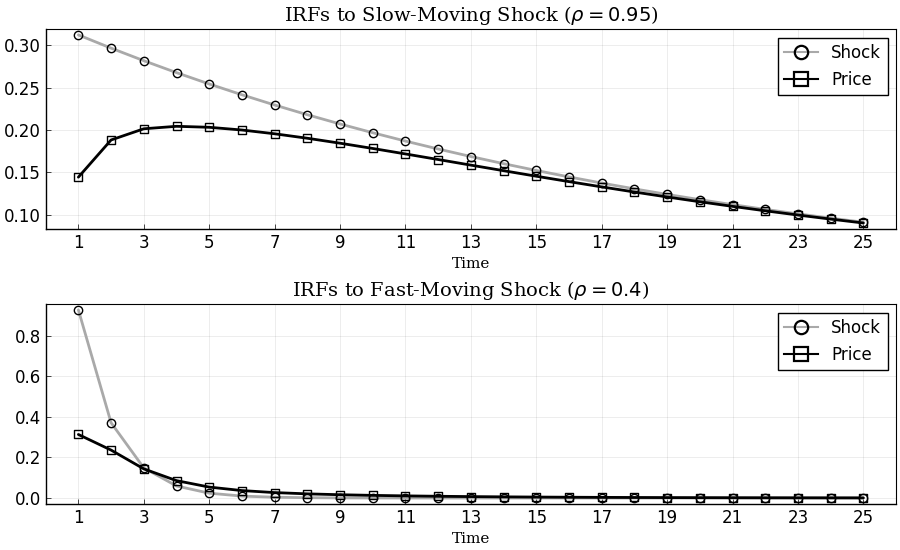

In [10]:
using Plots, LaTeXStrings; pyplot();
p1 = plot(1:T, [irfs_bp.x[1,1,:], irfs_bp.a[1,1,:]],
    title             = L"IRFs to Slow-Moving Shock ($\rho = 0.95$)",
    label             = ["Shock" "Price"],
    color             = [:darkgray :black],
    marker            = [:circle :square],
    markerstrokecolor = :match,
    markercolor       = false,
    markersize        = 6)
p2 = plot(1:T, [irfs_bp.x[2,2,:], irfs_bp.a[1,2,:]],
    title             = L"IRFs to Fast-Moving Shock ($\rho = 0.4$)",
    label             = ["Shock" "Price"],
    color             = [:darkgray :black],
    marker            = [:circle :square],
    markerstrokecolor = :match,
    markercolor       = false,
    markersize        = 6)
p = plot(p1,p2,
    layout     = (2,1),
    xlabel     = "Time",
    lw         = 2,
    xticks     = (1:2:T),
    xlim       = (0,T+1),
    fontfamily = "serif",
    legend     = :topright,
    legendfont = font(12),
    tickfont   = font(12),
    size       = (900,550),
    framestyle = :box)

### Lower Cost of Attention: $\omega=0.1$
Get the IRFs:

In [11]:
T = 25; #length of IRFs
irfs_lω = irfs(sol_lω,T = T);

Plot IRFs:

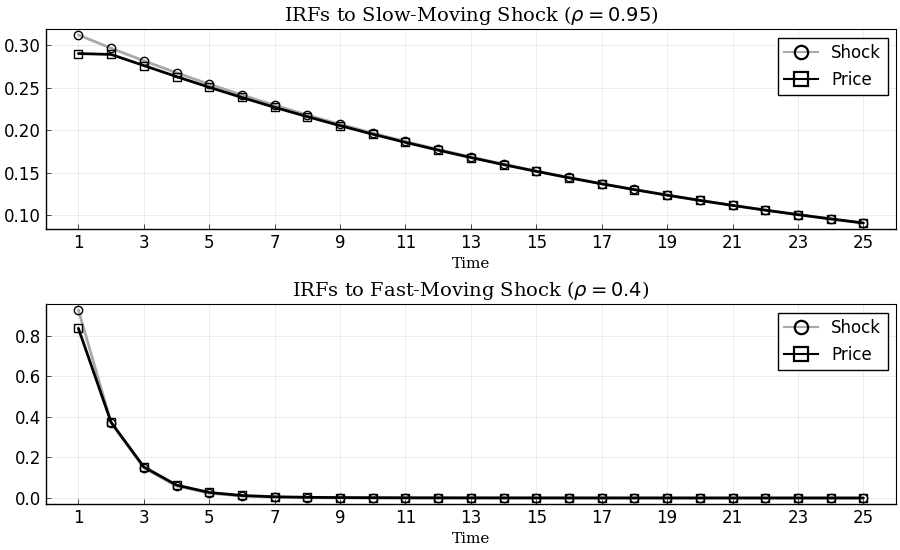

In [12]:
p1 = plot(1:T, [irfs_lω.x[1,1,:], irfs_lω.a[1,1,:]],
    title             = L"IRFs to Slow-Moving Shock ($\rho = 0.95$)",
    label             = ["Shock" "Price"],
    color             = [:darkgray :black],
    marker            = [:circle :square],
    markerstrokecolor = :match,
    markercolor       = false,
    markersize        = 6)
p2 = plot(1:T, [irfs_lω.x[2,2,:], irfs_lω.a[1,2,:]],
    title             = L"IRFs to Fast-Moving Shock ($\rho = 0.4$)",
    label             = ["Shock" "Price"],
    color             = [:darkgray :black],
    marker            = [:circle :square],
    markerstrokecolor = :match,
    markercolor       = false,
    markersize        = 6)
p = plot(p1,p2,
    layout     = (2,1),
    xlabel     = "Time",
    lw         = 2,
    xticks     = (1:2:T),
    xlim       = (0,T+1),
    fontfamily = "serif",
    legend     = :topright,
    legendfont = font(12),
    tickfont   = font(12),
    size       = (900,550),
    framestyle = :box)

### Other Discount Factors: $\beta\in\{0,1\}$
Get the IRFs:

In [13]:
T = 25; #length of IRFs
irfs_lβ = irfs(sol_lβ,T = T);
irfs_hβ = irfs(sol_hβ,T = T);

Plot IRFs:

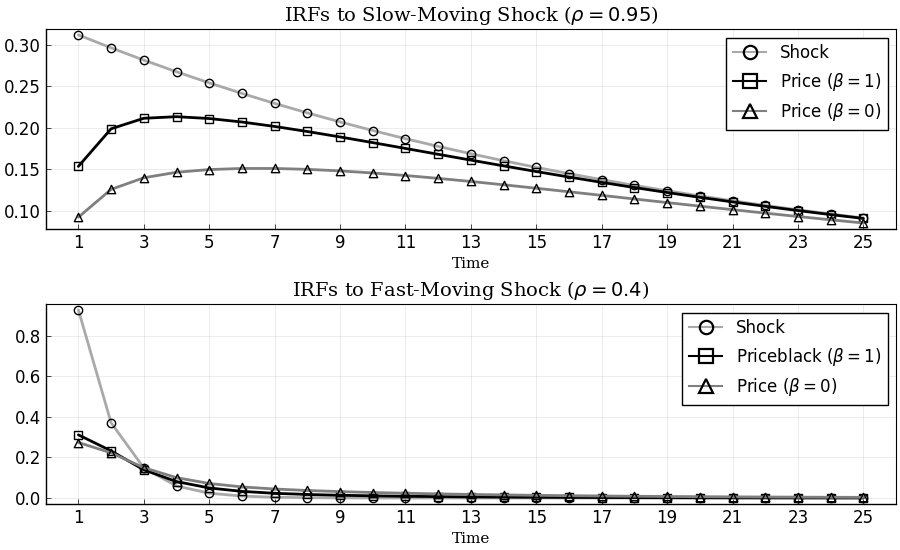

In [14]:
p1 = plot(1:T, [irfs_bp.x[1,1,:],irfs_hβ.a[1,1,:], irfs_lβ.a[1,1,:]],
    title             = L"IRFs to Slow-Moving Shock ($\rho = 0.95$)",
    label             = ["Shock" L"Price ($\beta=1$)" L"Price ($\beta=0$)"],
    color             = [:darkgray :black :gray50],
    marker            = [:circle :square :utriangle],
    markerstrokecolor = :match,
    markercolor       = false,
    markersize        = 6)
p2 = plot(1:T, [irfs_bp.x[2,2,:],irfs_hβ.a[1,2,:], irfs_lβ.a[1,2,:]],
    title             = L"IRFs to Fast-Moving Shock ($\rho = 0.4$)",
    label             = ["Shock" L"Priceblack ($\beta=1$)" L"Price ($\beta=0$)"],
    color             = [:darkgray :black :gray50],
    marker            = [:circle :square :utriangle],
    markerstrokecolor = :match,
    markercolor       = false,
    markersize        = 6)
p = plot(p1,p2,
    layout     = (2,1),
    xlabel     = "Time",
    lw         = 2,
    xticks     = (1:2:T),
    xlim       = (0,T+1),
    fontfamily = "serif",
    legend     = :topright,
    legendfont = font(12),
    tickfont   = font(12),
    size       = (900,550),
    framestyle = :box)

## Extensions

### Transition Dynamics of Attention

In this section, we solve for the transition dynamics of the optimal posterior covariance matrix starting from an initial prior that is different from the steady state prior.

For instance let us consider a case where the firm is at the steady state of the rational inattention problem at time 0, with prior covariance matrix $\bar{\Sigma}_{-1}$, and it receives a one time treatment with a perfectly informative signal about its optimal price:

$$s_0 = \mathbf{H}'\vec{x}_0$$

#### Solve for the transition dynamics
The function `Trip` solves for the transition dynamics automatically given the initial signal. Start by initializing the initial signal:

In [15]:
s0 = DRIPs.Signal(H,0.0);

Solve for the transition dynamics given $s_0$:

In [16]:
Tss     = 15; # guess for time until convergence
bp_trip = Trip(sol_bp, s0; T = Tss);

Performance for solving the transition dynamics for a random signal:

In [17]:
@benchmark Trip(sol_bp, S; T = 30) setup = (S = DRIPs.Signal(rand(2),0.0))

BenchmarkTools.Trial: 
  memory estimate:  502.61 KiB
  allocs estimate:  6202
  --------------
  minimum time:     508.558 μs (0.00% GC)
  median time:      540.418 μs (0.00% GC)
  mean time:        631.034 μs (10.71% GC)
  maximum time:     14.665 ms (93.81% GC)
  --------------
  samples:          7899
  evals/sample:     1

#### Plot Transition Path of Eigenvalues

Plot the marginal values of information. In this problem the state is two dimensional. At any time, for every orthogonalized dimension, the agent weighs the **marginal value** of acquiring information in that dimension against the **marginal cost** of attention which is the parameter $\omega$.**The number of signals that the agent acquires at any time is the number of marginal values that are larger than $\omega$.**

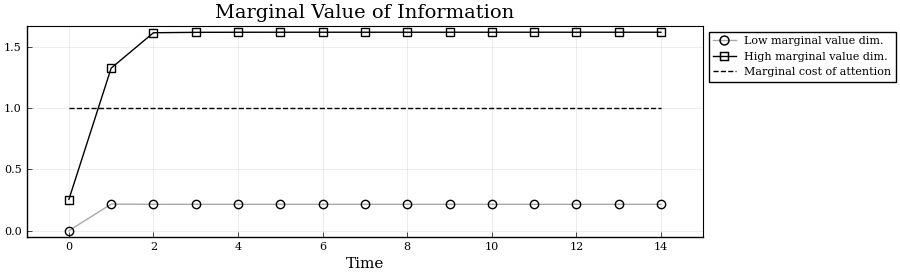

In [18]:
p = plot(0:Tss-1,[bp_trip.Ds[1,1:Tss],bp_trip.Ds[2,1:Tss],bp_trip.p.ω*ones(Tss,1)],
    label             = ["Low marginal value dim." "High marginal value dim." "Marginal cost of attention"],
    size              = (900,275),
    title             = "Marginal Value of Information",
    xlabel            = "Time",
    color             = [:darkgray :black :black],
    line              = [:solid :solid :dash],
    marker            = [:circle :square :none],
    markercolor       = false,
    markerstrokecolor = :match,
    markersize        = 6,
    xlim              = (-1,Tss),
    xticks            = 0:2:Tss-1,
    legend            = :outertopright,
    fontfamily        = "serif",
    framestyle        = :box)

### Impulse Response Functions with Information Treatment
Get the IRFs in the transition path after treatment:

In [19]:
T = 30;

tirfs_bp = irfs(sol_bp,s0,T = T); # irfs with treatment
irfs_bp  = irfs(sol_bp,T = T);    # irfs in the Ss (without treatment)

Plot IRFs:

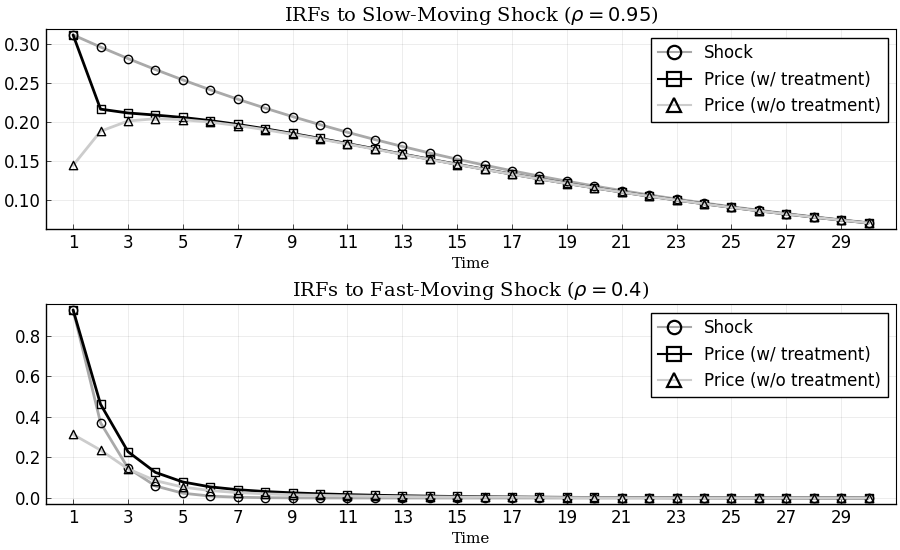

In [20]:
p1 = plot(1:T, [irfs_bp.x[1,1,:], tirfs_bp.a[1,1,:], irfs_bp.a[1,1,:]],
    title             = L"IRFs to Slow-Moving Shock ($\rho = 0.95$)",
    label             = ["Shock" "Price (w/ treatment)" "Price (w/o treatment)"],
    color             = [:darkgray :black :gray80],
    marker            = [:circle :square :utriangle],
    markerstrokecolor = :match,
    markercolor       = false,
    markersize        = 6)
p2 = plot(1:T, [tirfs_bp.x[2,2,:], tirfs_bp.a[1,2,:], irfs_bp.a[1,2,:]],
    title             = L"IRFs to Fast-Moving Shock ($\rho = 0.4$)",
    label             = ["Shock" "Price (w/ treatment)" "Price (w/o treatment)"],
    color             = [:darkgray :black :gray80],
    marker            = [:circle :square :utriangle],
    markerstrokecolor = :match,
    markercolor       = false,
    markersize        = 6)
p = plot(p1,p2,
    layout     = (2,1),
    xlabel     = "Time",
    lw         = 2,
    xticks     = (1:2:T),
    xlim       = (0,T+1),
    fontfamily = "serif",
    legend     = :topright,
    legendfont = font(12),
    tickfont   = font(12),
    size       = (900,550),
    framestyle = :box)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*